<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Shallow_neural_network_with_Keras_Spirals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow neural network with Keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_s_curve
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))

In [0]:
X, y = spirals(1000)

In [0]:
# generate two datasets
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


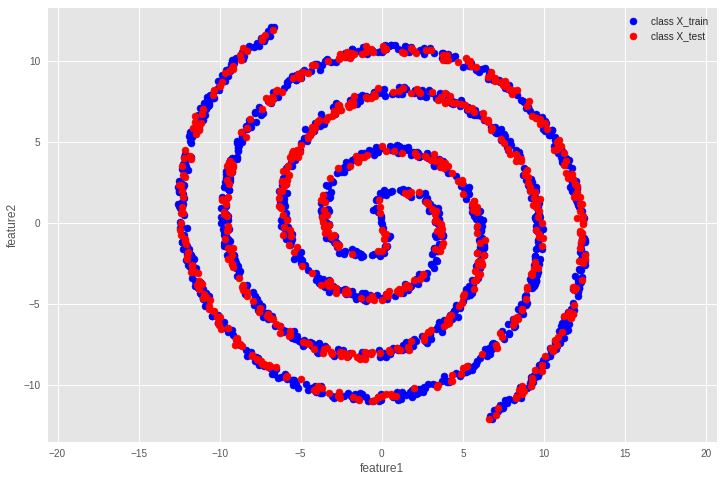

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1340, 2)
y_train:	(1340,)
x_test:		(660, 2)
y_test:		(660,)


In [0]:
# Hyper-parameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(14, input_dim=2, kernel_initializer='normal', activation='relu'))
  model.add(Dense(8,activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 14)                42        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

In [0]:
prediction_values = model.predict_classes(X_test)
prediction_values.shape

(660, 1)

In [0]:
print(np.mean(results.history["val_acc"]))

0.9602212121605873


In [0]:
# evaluate the model
scores = model.evaluate(X_train,y_train.T)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1340/1340 [==============================] - 0s 30us/step

acc: 100.00%


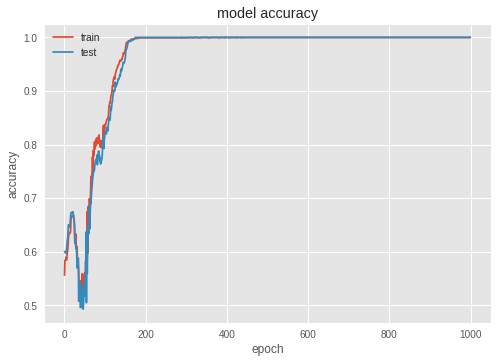

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.6740

Minimum Loss : 0.0007

Loss difference : 0.6732


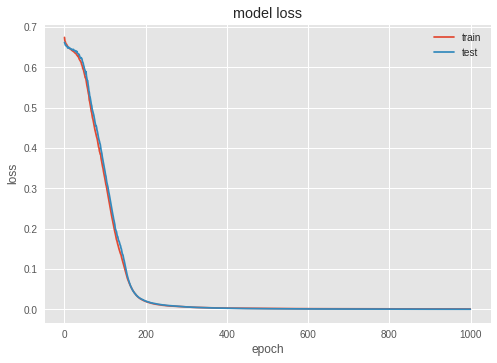

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# Visualization

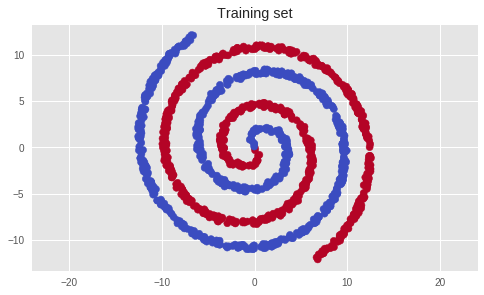

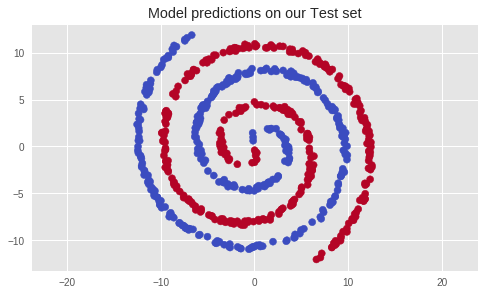

In [0]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

plt.figure(figsize =(8,10))
plt.subplot(212)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

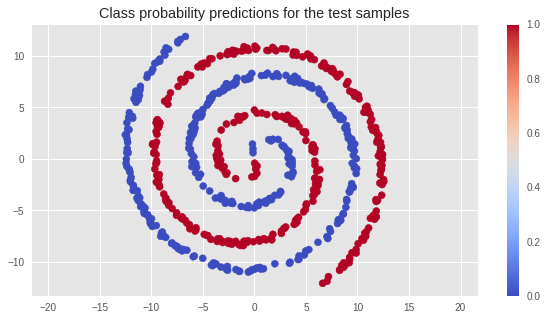

In [0]:
y_pp = model.predict_proba(X_test)

plt.figure(figsize =(10,5))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pp[:,0], cmap=cm.coolwarm)
plt.colorbar();
plt.title('Class probability predictions for the test samples')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

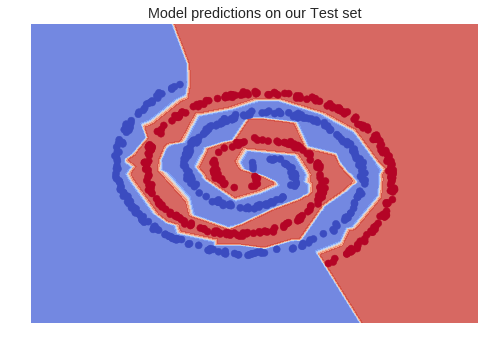

In [0]:
xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 14) :
 [[ 0.18978871  0.34195802  0.532164   -0.33044967  0.21825162 -0.45979375
   0.6562534   0.12140791  0.59432656 -0.3410804   0.45607075  0.40577775
  -0.60509294 -0.45310304]
 [-0.6599233   0.38726225  0.48915932  0.63099295 -0.32653627 -0.30617985
  -0.66273403  0.15376484  0.30428627  0.7457858   0.22233799 -0.1216668
  -1.5227733   0.27754527]]
Input layer biases (14,) :
 [-2.658102  -2.619481  -1.12292   -3.0419588 -2.3589294 -2.6397707
 -0.7862747 -1.5395303  0.489945   2.7550428  2.6853113 -2.6374197
  1.4452256 -1.7365206]

Hidden layer weights (14, 8) :
 [[ 1.0420508  -1.1655416  -1.7046003   2.2769995   1.3657845  -0.10828386
   0.20157911  1.4874527 ]
 [-1.0636969  -1.7245188  -1.4575615  -4.045612    1.0172818  -0.16502984
   1.5122603  -3.5867314 ]
 [ 2.1549506  -2.2189076  -0.5123719   2.1590214  -0.3100704   0.8716205
   1.2364888   1.24596   ]
 [ 2.6165617  -4.593868   -1.3510207  -0.90428114  0.34553826 -0.14117311
   1.2751307  -2.7997742